In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn Settings
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(color_codes=True)

%matplotlib inline

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB



<div class="alert alert-block alert-success">
<b>Insight:</b> 
    Above shows that the data is clean and ready for modeling or analysis.
</div>

In [5]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000



<div class="alert alert-block alert-success">
<b>Insight: </b>Above display the correlation of the columns.
</div>

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


<div class="alert alert-block alert-success">
<b>Insight: </b> We can see that the data is consists of object and int.
</div>

### Visualization

<AxesSubplot:>

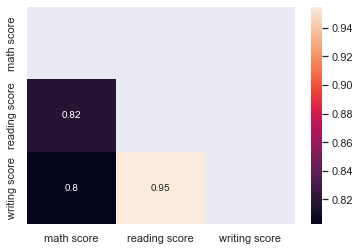

In [28]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),annot=True, mask=mask)

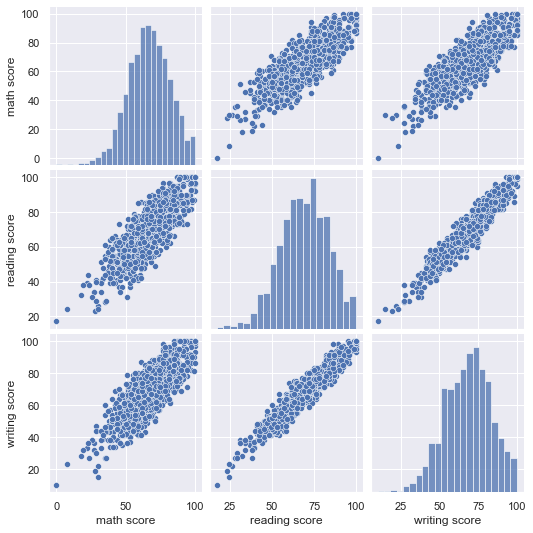

In [6]:
sns.pairplot(df)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
a = df['math score']
b = df['writing score']

len(a), len(b)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.33, random_state=42)

### Modeling

In [ ]:
#Figure size
plt.figure(figsize = (5,5))

#Labels
plt.xlabel('writing score')
plt.ylabel('math score')
plt.title('Time on Website vs. Yearly Amount Spent')

sns.regplot(x= a_train, y = b_train)

In [17]:
a_reshape = a.values.reshape(-1,1)
b_reshape = b.values.reshape(-1,1)

a_reshape.shape, b_reshape.shape

((1000, 1), (1000, 1))

In [18]:
a_train, a_test, b_train, b_test = train_test_split(a_reshape, b_reshape, test_size=0.2, random_state=5)

a_train.shape, a_test.shape, b_train.shape, b_test.shape

((800, 1), (200, 1), (800, 1), (200, 1))

In [19]:
linreg = LinearRegression()
linreg.fit(a_train,b_train)

LinearRegression()

In [20]:
b_pred = linreg.predict(a_test)
b_pred[0]

array([66.45067112])

In [21]:
R2 =r2_score(b_test,b_pred) .round(2)
R2

0.67

In [22]:
MAE=mean_absolute_error(b_test,b_pred).round(2)
MAE

7.4

In [23]:
def mape(b_test, b_pred):

    #MAPE
    mape = np.mean(np.abs(b_pred - b_test)/np.abs(b_test))
    
    return mape

In [24]:
MAPE=mape(b_test,b_pred).round(2)
MAPE

0.12

In [25]:
RMSE=np.sqrt(mean_squared_error(b_test,b_pred)).round(2) #RMSE
RMSE

8.86

In [26]:
MSE=mean_squared_error(b_test,b_pred).round(2)
MSE

78.45

### RESULTS

In [27]:
print("R^2: "+str(R2))
print("Mean Absolute Error: "+str(MAE)) 
print("Mean Absolute Percentage Error: "+str(MAPE))
print("Mean Squared Error: "+str(MSE))
print("Root Mean Squared Error: "+str(RMSE))

R^2: 0.67
Mean Absolute Error: 7.4
Mean Absolute Percentage Error: 0.12
Mean Squared Error: 78.45
Root Mean Squared Error: 8.86
